In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
gen_quant = CmdStanModel(stan_file='code_1.stan')
samples = gen_quant.sample(data={'M':6}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [11]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,2.97798,3.0,0.0,4.0,0.0,2.0,3.0
1,0.0,0.0,128.60100,125.0,121.0,124.0,112.0,111.0,129.0
2,0.0,0.0,49.61760,48.0,55.0,53.0,57.0,63.0,48.0
3,0.0,0.0,174.85300,152.0,202.0,157.0,186.0,167.0,170.0
4,0.0,0.0,35.45750,26.0,34.0,48.0,27.0,38.0,40.0
...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,16.44170,14.0,18.0,14.0,18.0,15.0,16.0
996,0.0,0.0,140.13100,130.0,131.0,143.0,136.0,127.0,146.0
997,0.0,0.0,53.68600,57.0,51.0,61.0,45.0,67.0,64.0
998,0.0,0.0,72.80080,69.0,76.0,61.0,60.0,89.0,76.0


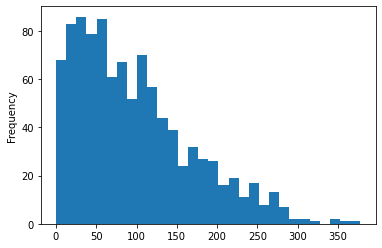

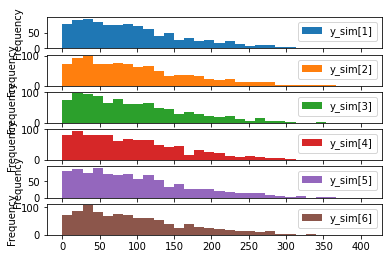

In [13]:
Lambda = df['lambda']

Lambda.plot.hist(bins=30)
plt.show()


df2 = df.drop(df.columns[0:3],axis=1)
df2.plot.hist(subplots=True, bins=30)
plt.show()

In [9]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▏         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)


chain 1 |██▎       | 00:01 Iteration: 1400 / 7000 [ 20%]  (Sampling)
chain 1 |██▋       | 00:01 Iteration: 1600 / 7000 [ 22%]  (Sampling)


chain 1 |██▉       | 00:02 Iteration: 1800 / 7000 [ 25%]  (Sampling)



chain 1 |███▏      | 00:02 Iteration: 2000 / 7000 [ 28%]  (Sampling)


chain 1 |███▎      | 00:02 Iteration: 2100 / 7000 [ 30%]  (Sampling)


chain 1 |███▍      | 00:03 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |███▌      | 00:03 Iteration: 2300 / 7000 [ 32%]  (Sampling)


chain 1 |███▊      | 00:03 Iteration: 2400 / 7000 [ 34%]  (Sampling)


chain 1 |███▉      | 00:03 Iteration: 2500 / 7000 [ 35%]  (Sampling)


chain 1 |████      | 00:04 Iteration: 2600 / 7000 [ 37%]  (Sampling)


chain 1 |████▏     | 00:04 Iteration: 2700 / 7000 [ 


INFO:cmdstanpy:CmdStan done processing.


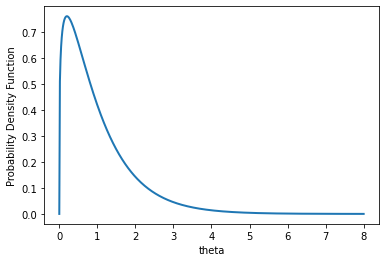

In [14]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)



chain 1 |██▌       | 00:01 Iteration: 1500 / 7000 [ 21%]  (Sampling)




chain 1 |██▉       | 00:02 Iteration: 1800 / 7000 [ 25%]  (Sampling)


chain 1 |███▏      | 00:02 Iteration: 2000 / 7000 [ 28%]  (Sampling)


chain 1 |███▍      | 00:02 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |███▊      | 00:03 Iteration: 2400 / 7000 [ 34%]  (Sampling)



chain 1 |████      | 00:03 Iteration: 2600 / 7000 [ 37%]  (Sampling)


chain 1 |████▏     | 00:03 Iteration: 2700 / 7000 [ 38%]  (Sampling)


chain 1 |████▎     | 00:03 Iteration: 2800 / 7000 [ 40%]  (Sampling)


chain 1 |████▍     | 00:04 Iteration: 2900 / 7000 [ 41%]  (Sampling)


chain 1 |████▌     | 00:04 Iteration: 3000 / 7000 [ 42%]  (Sampling)


chain 1 |████▋     | 00:04 Iteration: 3100 / 7000 


INFO:cmdstanpy:CmdStan done processing.


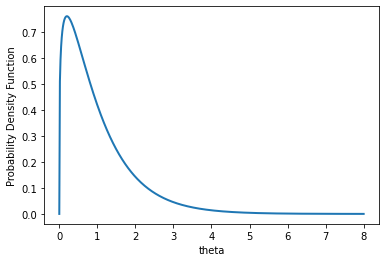

In [15]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

In [16]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 6 # number of letters in the first name
L = 9 # number of letters in the last name
y0 = 3# initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.91168


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status

chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                     

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


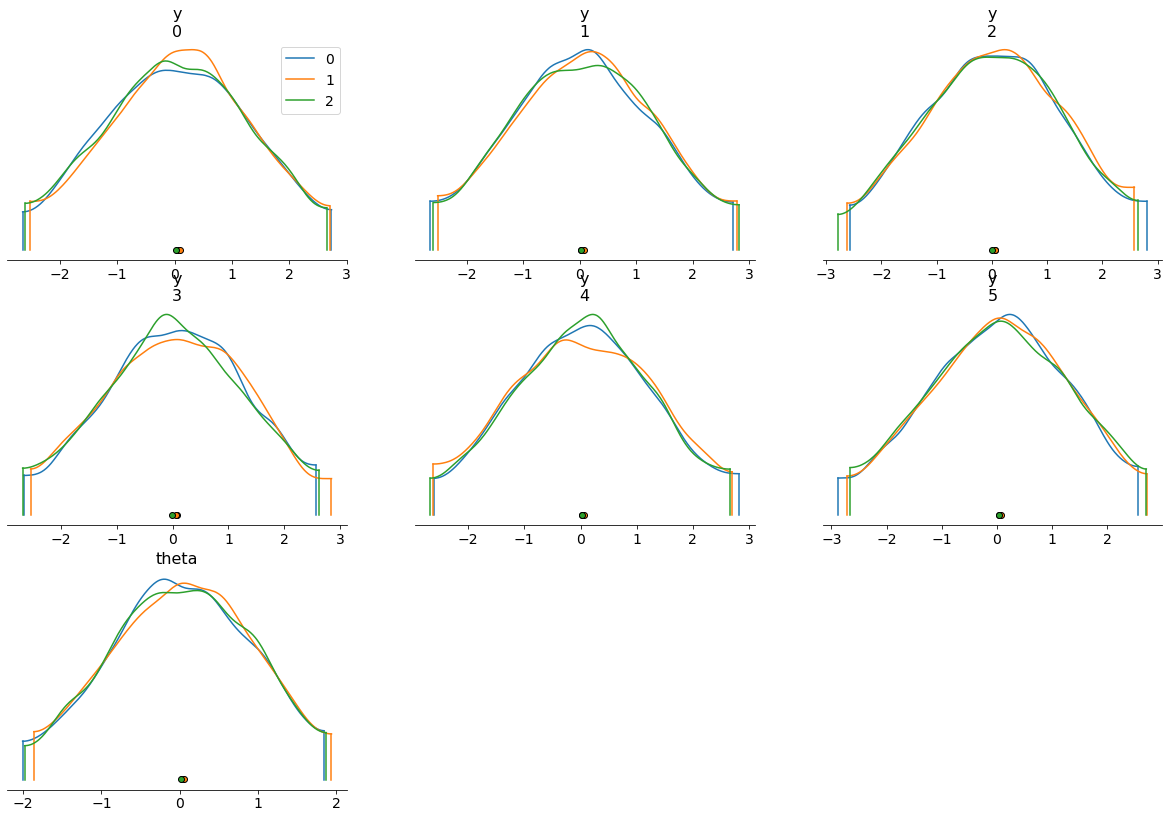

In [17]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': 6}
seed = 21082000
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)
az.plot_density([result_1,result_2,result_3])
plt.show()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] done processing


<AxesSubplot:ylabel='Frequency'>

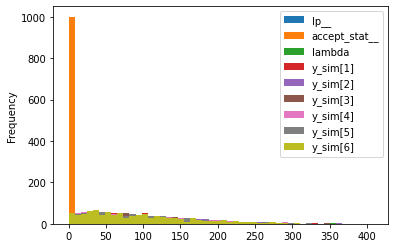

In [22]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)
# investigate the output and plot histogram of mean_y variable

df.plot.hist(bins=50)